# บทนำสู่ความน่าจะเป็นและสถิติ  
ในสมุดบันทึกนี้ เราจะมาลองเล่นกับแนวคิดบางอย่างที่เราได้พูดถึงไปก่อนหน้านี้ แนวคิดหลายอย่างจากความน่าจะเป็นและสถิตินั้นมีการนำเสนอไว้อย่างดีในไลบรารีหลักสำหรับการประมวลผลข้อมูลใน Python เช่น `numpy` และ `pandas`


In [117]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt

## ตัวแปรสุ่มและการแจกแจง
มาเริ่มต้นด้วยการสุ่มตัวอย่างจำนวน 30 ค่า จากการแจกแจงแบบสม่ำเสมอระหว่าง 0 ถึง 9 เราจะคำนวณค่าเฉลี่ยและความแปรปรวนด้วย


In [118]:
sample = [ random.randint(0,10) for _ in range(30) ]
print(f"Sample: {sample}")
print(f"Mean = {np.mean(sample)}")
print(f"Variance = {np.var(sample)}")

Sample: [0, 8, 1, 0, 7, 4, 3, 3, 6, 7, 1, 0, 6, 3, 1, 5, 9, 2, 4, 2, 5, 6, 8, 7, 1, 9, 8, 2, 3, 7]
Mean = 4.266666666666667
Variance = 8.195555555555556


ในการประมาณจำนวนค่าที่แตกต่างกันในตัวอย่างโดยการมองเห็น เราสามารถสร้าง **ฮิสโตแกรม**:


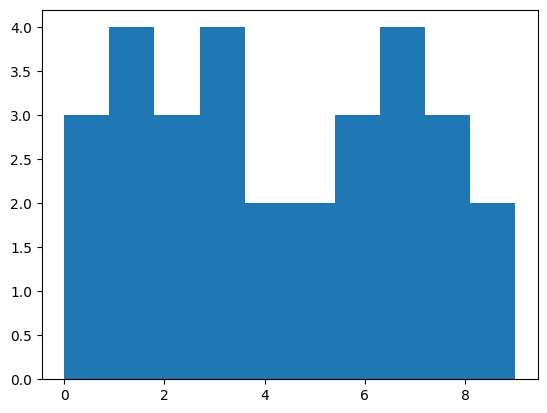

In [119]:
plt.hist(sample)
plt.show()

## การวิเคราะห์ข้อมูลจริง

ค่าเฉลี่ยและความแปรปรวนเป็นสิ่งสำคัญมากเมื่อวิเคราะห์ข้อมูลในโลกความเป็นจริง มาลองโหลดข้อมูลเกี่ยวกับนักเบสบอลจาก [SOCR MLB Height/Weight Data](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_MLB_HeightsWeights)


In [120]:
df = pd.read_csv("../../data/SOCR_MLB.tsv",sep='\t', header=None, names=['Name','Team','Role','Weight','Height','Age'])
df


Empty DataFrame
Columns: [Name, Team, Role, Weight, Height, Age]
Index: []


เราใช้แพ็กเกจที่เรียกว่า [**Pandas**](https://pandas.pydata.org/) สำหรับการวิเคราะห์ข้อมูล ในบทเรียนนี้เราจะพูดถึง Pandas และการทำงานกับข้อมูลใน Python เพิ่มเติมในภายหลัง

มาคำนวณค่าเฉลี่ยสำหรับอายุ ความสูง และน้ำหนักกัน:


In [121]:
df[['Age','Height','Weight']].mean()

Age        28.736712
Height    201.726306
Weight     73.697292
dtype: float64

ตอนนี้เรามาเน้นที่ความสูง และคำนวณส่วนเบี่ยงเบนมาตรฐานและความแปรปรวน:


In [122]:
print(list(df['Height'])[:20])

[180, 215, 210, 210, 188, 176, 209, 200, 231, 180, 188, 180, 185, 160, 180, 185, 197, 189, 185, 219]


In [123]:
mean = df['Height'].mean()
var = df['Height'].var()
std = df['Height'].std()
print(f"Mean = {mean}\nVariance = {var}\nStandard Deviation = {std}")

Mean = 201.72630560928434
Variance = 441.6355706557866
Standard Deviation = 21.01512718628623


นอกเหนือจากค่าเฉลี่ยแล้ว การพิจารณาค่ามัธยฐานและควอไทล์ก็มีความสำคัญ สามารถแสดงผลได้โดยใช้ **box plot**:


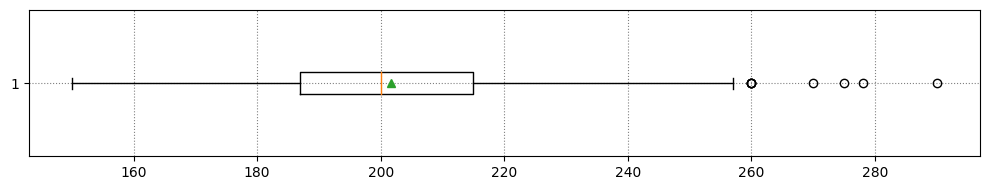

In [124]:
plt.figure(figsize=(10,2))
plt.boxplot(df['Height'], vert=False, showmeans=True)
plt.grid(color='gray', linestyle='dotted')
plt.tight_layout()
plt.show()

เรายังสามารถสร้างแผนภาพกล่องของชุดข้อมูลย่อยของเราได้ เช่น การจัดกลุ่มตามบทบาทของผู้เล่น


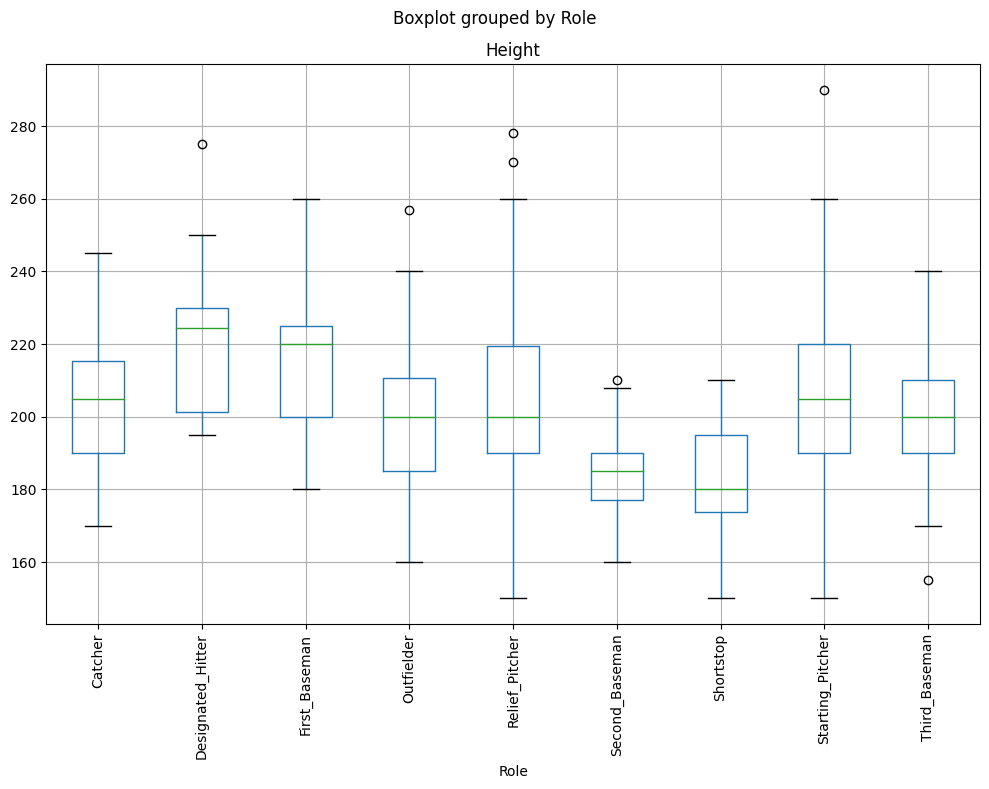

In [125]:
df.boxplot(column='Height', by='Role', figsize=(10,8))
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

> **หมายเหตุ**: แผนภาพนี้แสดงให้เห็นว่า โดยเฉลี่ยแล้ว ความสูงของผู้เล่นเบสคนแรกมักจะสูงกว่าความสูงของผู้เล่นเบสคนที่สอง ต่อไปเราจะเรียนรู้วิธีทดสอบสมมติฐานนี้อย่างเป็นทางการ และวิธีแสดงให้เห็นว่าข้อมูลของเรามีนัยสำคัญทางสถิติที่สามารถยืนยันข้อสรุปนี้ได้  

อายุ ความสูง และน้ำหนัก ล้วนเป็นตัวแปรสุ่มแบบต่อเนื่อง คุณคิดว่าการแจกแจงของพวกมันเป็นอย่างไร? วิธีที่ดีในการค้นหาคือการพล็อตฮิสโตแกรมของค่า:


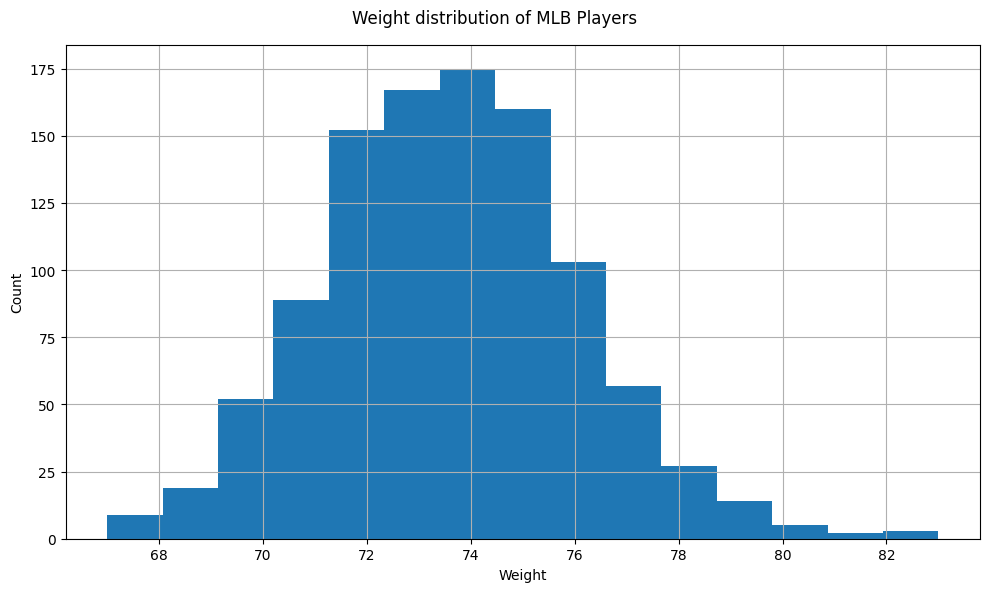

In [126]:
df['Weight'].hist(bins=15, figsize=(10,6))
plt.suptitle('Weight distribution of MLB Players')
plt.xlabel('Weight')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## การแจกแจงแบบปกติ

มาสร้างตัวอย่างน้ำหนักจำลองที่มีการแจกแจงแบบปกติ โดยมีค่าเฉลี่ยและความแปรปรวนเท่ากับข้อมูลจริงของเรา:


In [127]:
generated = np.random.normal(mean, std, 1000)
generated[:20]

array([183.05261872, 193.52828463, 154.73707302, 204.27140391,
       203.88907247, 213.74665656, 225.10092364, 171.75867917,
       204.3521425 , 207.52870255, 158.53001756, 240.94399197,
       189.9909742 , 180.72442994, 173.4393402 , 175.98883711,
       197.86092769, 188.61598821, 234.19796698, 209.0295457 ])

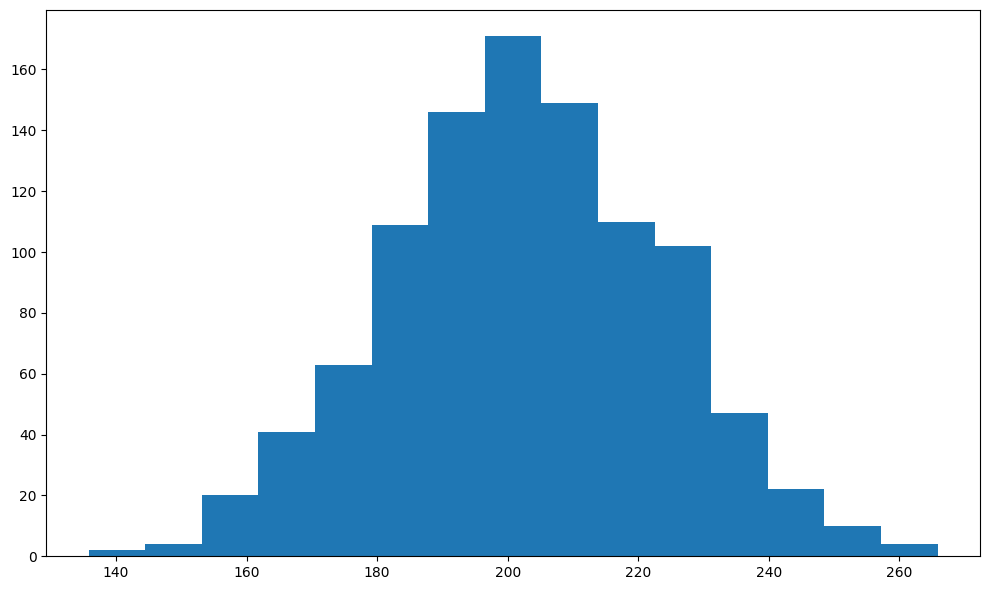

In [128]:
plt.figure(figsize=(10,6))
plt.hist(generated, bins=15)
plt.tight_layout()
plt.show()

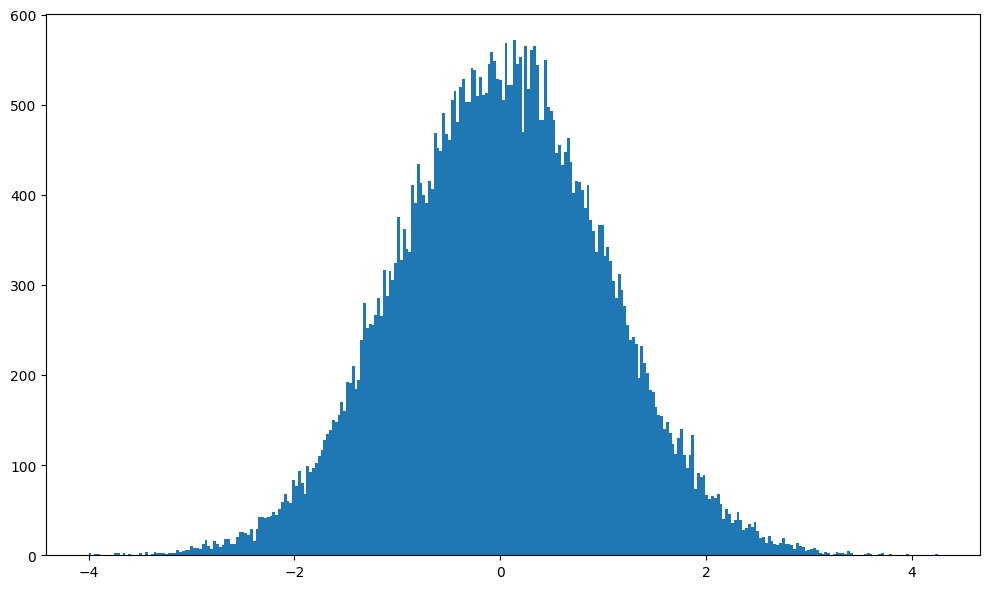

In [129]:
plt.figure(figsize=(10,6))
plt.hist(np.random.normal(0,1,50000), bins=300)
plt.tight_layout()
plt.show()

เนื่องจากค่าต่าง ๆ ในชีวิตจริงมักมีการแจกแจงแบบปกติ เราไม่ควรใช้ตัวสร้างตัวเลขสุ่มแบบสม่ำเสมอเพื่อสร้างข้อมูลตัวอย่าง นี่คือสิ่งที่จะเกิดขึ้นหากเราพยายามสร้างน้ำหนักด้วยการแจกแจงแบบสม่ำเสมอ (สร้างโดย `np.random.rand`):


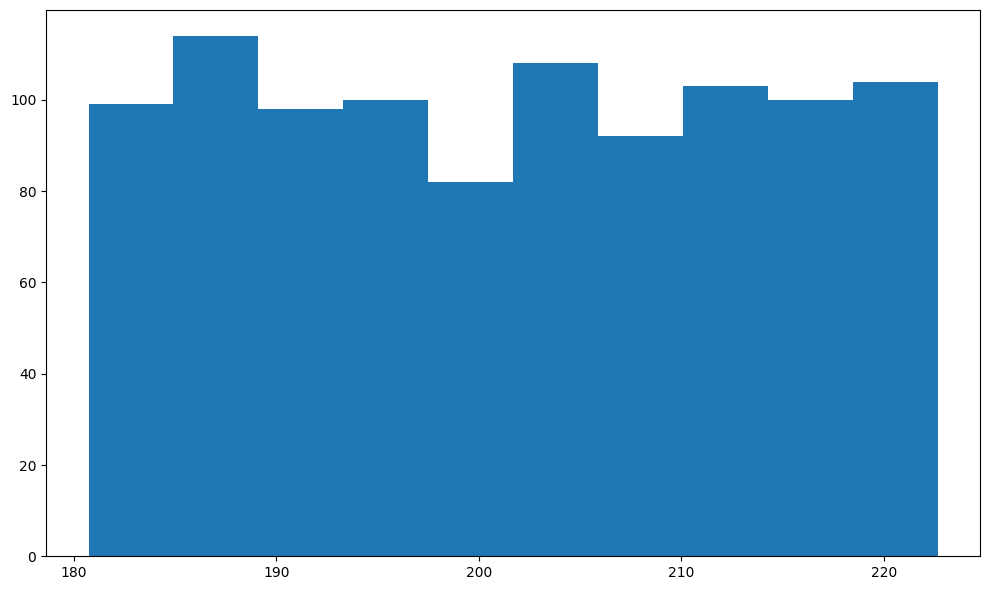

In [130]:
wrong_sample = np.random.rand(1000)*2*std+mean-std
plt.figure(figsize=(10,6))
plt.hist(wrong_sample)
plt.tight_layout()
plt.show()

## ช่วงความเชื่อมั่น

ตอนนี้เรามาคำนวณช่วงความเชื่อมั่นสำหรับน้ำหนักและส่วนสูงของนักเบสบอลกัน เราจะใช้โค้ด [จากการอภิปรายใน stackoverflow นี้](https://stackoverflow.com/questions/15033511/compute-a-confidence-interval-from-sample-data):


In [131]:
import scipy.stats

def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

for p in [0.85, 0.9, 0.95]:
    m, h = mean_confidence_interval(df['Weight'].fillna(method='pad'),p)
    print(f"p={p:.2f}, mean = {m:.2f} ± {h:.2f}")

p=0.85, mean = 73.70 ± 0.10
p=0.90, mean = 73.70 ± 0.12
p=0.95, mean = 73.70 ± 0.14


## การทดสอบสมมติฐาน

มาสำรวจบทบาทต่าง ๆ ในชุดข้อมูลนักเบสบอลของเรากัน:


In [132]:
df.groupby('Role').agg({ 'Weight' : 'mean', 'Height' : 'mean', 'Age' : 'count'}).rename(columns={ 'Age' : 'Count'})

Weight      Height  Count
Role                                           
Catcher            72.723684  204.328947     76
Designated_Hitter  74.222222  220.888889     18
First_Baseman      74.000000  213.109091     55
Outfielder         73.010309  199.113402    194
Relief_Pitcher     74.374603  203.517460    315
Second_Baseman     71.362069  184.344828     58
Shortstop          71.903846  182.923077     52
Starting_Pitcher   74.719457  205.321267    221
Third_Baseman      73.044444  200.955556     45

In [133]:
for p in [0.85,0.9,0.95]:
    m1, h1 = mean_confidence_interval(df.loc[df['Role']=='First_Baseman',['Height']],p)
    m2, h2 = mean_confidence_interval(df.loc[df['Role']=='Second_Baseman',['Height']],p)
    print(f'Conf={p:.2f}, 1st basemen height: {m1-h1[0]:.2f}..{m1+h1[0]:.2f}, 2nd basemen height: {m2-h2[0]:.2f}..{m2+h2[0]:.2f}')

Conf=0.85, 1st basemen height: 209.36..216.86, 2nd basemen height: 182.24..186.45
Conf=0.90, 1st basemen height: 208.82..217.40, 2nd basemen height: 181.93..186.76
Conf=0.95, 1st basemen height: 207.97..218.25, 2nd basemen height: 181.45..187.24


เราสามารถเห็นได้ว่าช่วงเวลาเหล่านี้ไม่มีการทับซ้อนกัน

วิธีที่ถูกต้องทางสถิติมากขึ้นในการพิสูจน์สมมติฐานคือการใช้ **Student t-test**:


In [134]:
from scipy.stats import ttest_ind

tval, pval = ttest_ind(df.loc[df['Role']=='First_Baseman',['Height']], df.loc[df['Role']=='Second_Baseman',['Height']],equal_var=False)
print(f"T-value = {tval[0]:.2f}\nP-value: {pval[0]}")

T-value = 9.77
P-value: 1.4185554184322326e-15


ค่าทั้งสองที่ได้จากฟังก์ชัน `ttest_ind` คือ:
* p-value สามารถพิจารณาได้ว่าเป็นความน่าจะเป็นที่การแจกแจงสองชุดมีค่าเฉลี่ยเท่ากัน ในกรณีของเรา ค่า p-value ต่ำมาก ซึ่งหมายความว่ามีหลักฐานที่ชัดเจนสนับสนุนว่าผู้เล่นเบสคนแรกมีความสูงมากกว่า
* t-value คือค่ากลางของความแตกต่างของค่าเฉลี่ยที่ถูกปรับให้เป็นมาตรฐาน ซึ่งใช้ใน t-test และจะถูกเปรียบเทียบกับค่าขีดจำกัดสำหรับค่าความเชื่อมั่นที่กำหนด


## การจำลองการแจกแจงแบบปกติด้วยทฤษฎีขีดจำกัดกลาง

ตัวสร้างตัวเลขสุ่มใน Python ถูกออกแบบมาให้สร้างการแจกแจงแบบสม่ำเสมอ หากเราต้องการสร้างตัวสร้างสำหรับการแจกแจงแบบปกติ เราสามารถใช้ทฤษฎีขีดจำกัดกลางได้ เพื่อให้ได้ค่าที่แจกแจงแบบปกติ เราจะคำนวณค่าเฉลี่ยของตัวอย่างที่สร้างแบบสม่ำเสมอ


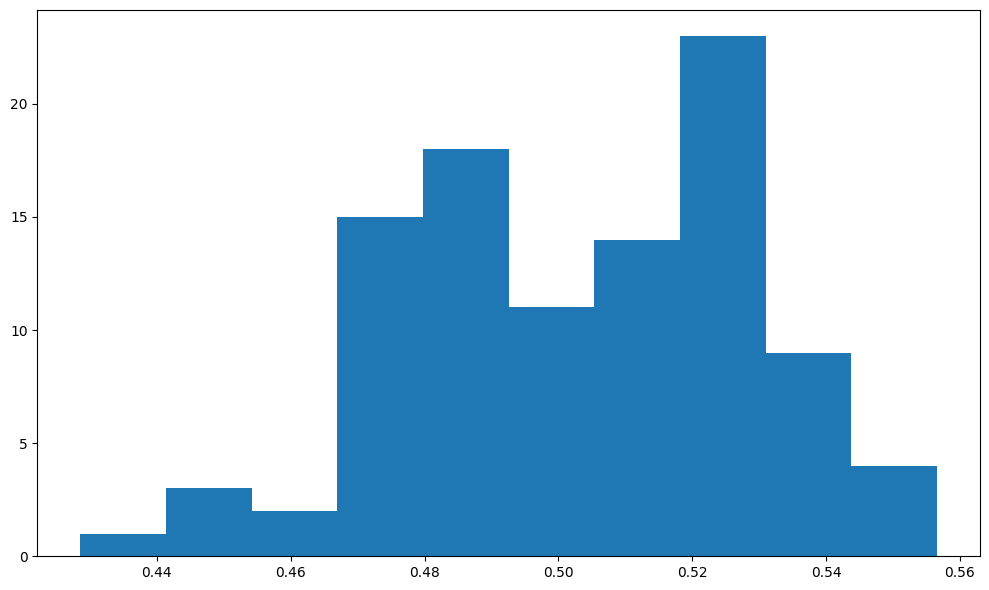

In [135]:
def normal_random(sample_size=100):
    sample = [random.uniform(0,1) for _ in range(sample_size) ]
    return sum(sample)/sample_size

sample = [normal_random() for _ in range(100)]
plt.figure(figsize=(10,6))
plt.hist(sample)
plt.tight_layout()
plt.show()

## ความสัมพันธ์และบริษัทเบสบอลจอมวายร้าย

ความสัมพันธ์ช่วยให้เราค้นหาความเชื่อมโยงระหว่างลำดับข้อมูลต่าง ๆ ได้ ในตัวอย่างสมมติของเรา ลองจินตนาการว่ามีบริษัทเบสบอลจอมวายร้ายที่จ่ายเงินให้ผู้เล่นตามความสูงของพวกเขา - ยิ่งผู้เล่นสูงมากเท่าไร ก็ยิ่งได้เงินมากขึ้นเท่านั้น สมมติว่ามีเงินเดือนพื้นฐานอยู่ที่ $1000 และมีโบนัสเพิ่มเติมตั้งแต่ $0 ถึง $100 ขึ้นอยู่กับความสูง เราจะใช้ข้อมูลผู้เล่นจริงจาก MLB และคำนวณเงินเดือนในจินตนาการของพวกเขา:


In [136]:
heights = df['Height']
salaries = 1000+(heights-heights.min())/(heights.max()-heights.mean())*100
print(list(zip(heights, salaries))[:10])

[(180, 1033.985209531635), (215, 1073.6346206518763), (210, 1067.9704190632704), (210, 1067.9704190632704), (188, 1043.0479320734046), (176, 1029.4538482607504), (209, 1066.837578745549), (200, 1056.6420158860585), (231, 1091.760065735415), (180, 1033.985209531635)]


ตอนนี้เรามาคำนวณความสัมพันธ์ร่วมและความสัมพันธ์ของลำดับเหล่านั้นกัน `np.cov` จะให้สิ่งที่เรียกว่า **เมทริกซ์ความสัมพันธ์ร่วม** ซึ่งเป็นการขยายความสัมพันธ์ร่วมไปยังตัวแปรหลายตัว องค์ประกอบ $M_{ij}$ ของเมทริกซ์ความสัมพันธ์ร่วม $M$ คือความสัมพันธ์ระหว่างตัวแปรอินพุต $X_i$ และ $X_j$ และค่าบนเส้นทแยงมุม $M_{ii}$ คือความแปรปรวนของ $X_{i}$ ในทำนองเดียวกัน `np.corrcoef` จะให้ **เมทริกซ์ความสัมพันธ์** แก่เรา


In [137]:
print(f"Covariance matrix:\n{np.cov(heights, salaries)}")
print(f"Covariance = {np.cov(heights, salaries)[0,1]}")
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Covariance matrix:
[[441.63557066 500.30258018]
 [500.30258018 566.76293389]]
Covariance = 500.3025801786725
Correlation = 0.9999999999999997


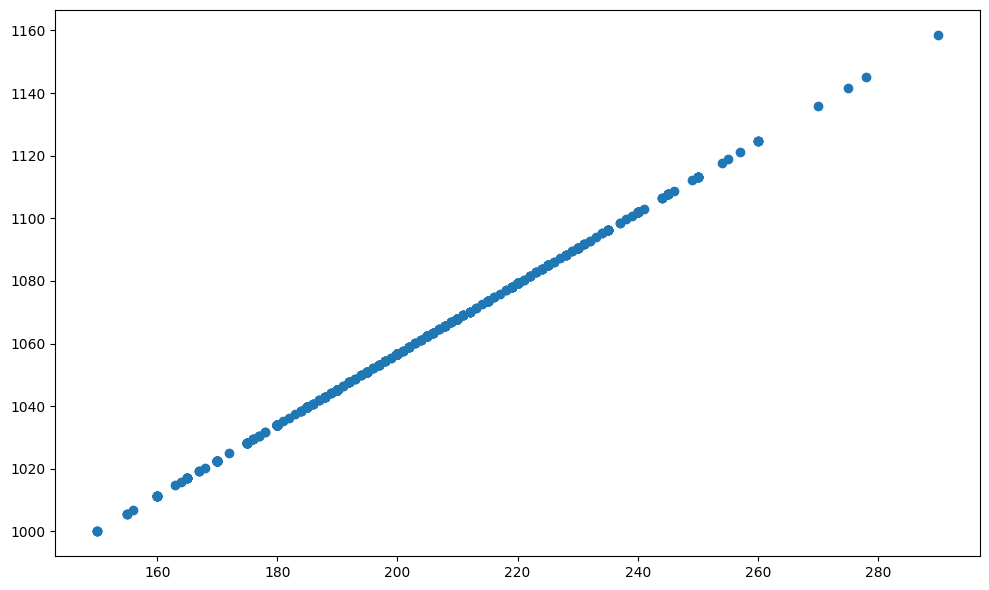

In [138]:
plt.figure(figsize=(10,6))
plt.scatter(heights,salaries)
plt.tight_layout()
plt.show()

In [139]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.9910655775558532


ในกรณีนี้ ความสัมพันธ์มีขนาดเล็กลงเล็กน้อย แต่ก็ยังค่อนข้างสูงอยู่ ตอนนี้ เพื่อทำให้ความสัมพันธ์ดูไม่ชัดเจนยิ่งขึ้น เราอาจต้องการเพิ่มความสุ่มเพิ่มเติมโดยการเพิ่มตัวแปรสุ่มบางตัวเข้าไปในเงินเดือน มาดูกันว่าจะเกิดอะไรขึ้น:


In [140]:
salaries = 1000+np.sin((heights-heights.min())/(heights.max()-heights.mean()))*100+np.random.random(size=len(heights))*20-10
print(f"Correlation = {np.corrcoef(heights, salaries)[0,1]}")

Correlation = 0.948230287835537


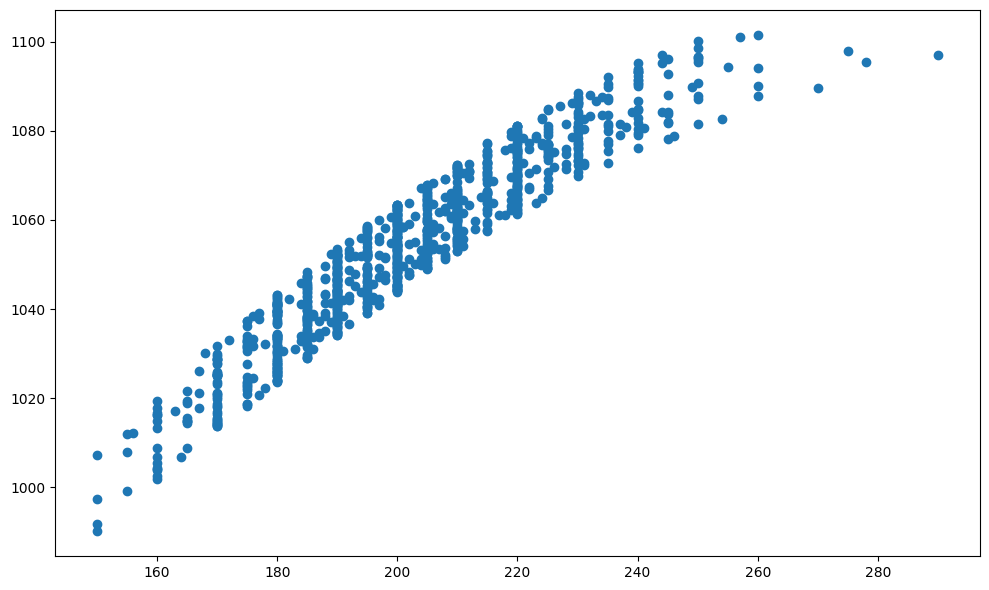

In [141]:
plt.figure(figsize=(10,6))
plt.scatter(heights, salaries)
plt.tight_layout()
plt.show()

คุณพอจะเดาได้ไหมว่าทำไมจุดถึงเรียงตัวเป็นเส้นแนวตั้งแบบนี้?

เราได้สังเกตความสัมพันธ์ระหว่างแนวคิดที่ถูกสร้างขึ้นอย่างเงินเดือน กับตัวแปรที่สังเกตได้อย่าง *ส่วนสูง* แล้ว ลองมาดูกันว่าตัวแปรที่สังเกตได้สองตัว เช่น ส่วนสูงและน้ำหนัก มีความสัมพันธ์กันด้วยหรือไม่:


In [142]:
np.corrcoef(df['Height'],df['Weight'])

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

น่าเสียดายที่เราไม่ได้ผลลัพธ์ใดๆ นอกจากค่าที่แปลกๆ อย่าง `nan` เท่านั้น สาเหตุเกิดจากบางค่าที่อยู่ในซีรีส์ของเรานั้นไม่มีการกำหนดค่า ซึ่งแสดงเป็น `nan` ทำให้ผลลัพธ์ของการดำเนินการกลายเป็นค่าที่ไม่มีการกำหนดเช่นกัน เมื่อเราดูที่เมทริกซ์ เราจะเห็นว่า `Weight` เป็นคอลัมน์ที่มีปัญหา เนื่องจากการคำนวณการสัมพันธ์ตัวเองระหว่างค่าของ `Height` ได้ถูกดำเนินการไปแล้ว

> ตัวอย่างนี้แสดงให้เห็นถึงความสำคัญของ **การเตรียมข้อมูล** และ **การทำความสะอาดข้อมูล** หากไม่มีข้อมูลที่เหมาะสม เราจะไม่สามารถคำนวณอะไรได้เลย

ลองใช้เมธอด `fillna` เพื่อเติมค่าที่หายไป และคำนวณการสัมพันธ์:


In [143]:
np.corrcoef(df['Height'],df['Weight'].fillna(method='pad'))

array([[1.        , 0.52959196],
       [0.52959196, 1.        ]])

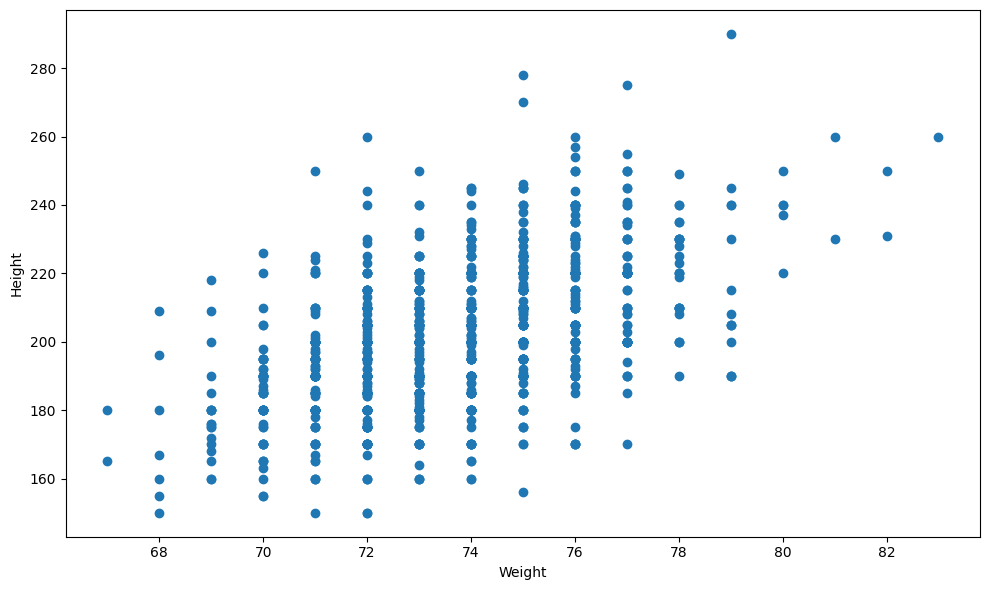

In [144]:
plt.figure(figsize=(10,6))
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')
plt.tight_layout()
plt.show()

## สรุป

ในสมุดบันทึกนี้ เราได้เรียนรู้วิธีการดำเนินการพื้นฐานกับข้อมูลเพื่อคำนวณฟังก์ชันทางสถิติ เราเข้าใจแล้วว่าควรใช้อุปกรณ์ทางคณิตศาสตร์และสถิติอย่างไรเพื่อพิสูจน์สมมติฐานบางอย่าง และวิธีการคำนวณช่วงความเชื่อมั่นสำหรับตัวแปรใดๆ โดยอ้างอิงจากตัวอย่างข้อมูล



---

**ข้อจำกัดความรับผิดชอบ**:  
เอกสารนี้ได้รับการแปลโดยใช้บริการแปลภาษา AI [Co-op Translator](https://github.com/Azure/co-op-translator) แม้ว่าเราจะพยายามให้การแปลมีความถูกต้อง แต่โปรดทราบว่าการแปลอัตโนมัติอาจมีข้อผิดพลาดหรือความไม่แม่นยำ เอกสารต้นฉบับในภาษาดั้งเดิมควรถือเป็นแหล่งข้อมูลที่เชื่อถือได้ สำหรับข้อมูลที่สำคัญ แนะนำให้ใช้บริการแปลภาษาจากผู้เชี่ยวชาญ เราไม่รับผิดชอบต่อความเข้าใจผิดหรือการตีความที่ผิดพลาดซึ่งเกิดจากการใช้การแปลนี้
